1. 프로젝트 구상

    1-1. 프로젝트 아이디어 구상
    아이디어 브레인 스토밍

    1-2. 프로젝트 목표 설정

        - 웹 애플리케이션의 목적, 얻고자 하는 주요 목표, 대상 명확히

    1-3. 개발 기간 확인 및 개발 계획 수립

        -일정 및 업무 분담(노션, 구글 공유 드라이브/git hub)
         actions, issue 기능
        
        - 활용 협업 툴: github, gitlab, notion 등
    

2. 프로젝트 분석 및 설계, 디자인
   
   GDWEB
    2-1. 사용자 사례 분석 및 모델링
    
        사용자 사례: 사용자가 웹 사이트나 애플리케이션을 이용할 때 보거나 수행하는 일 정리
        모델링: UML(unified modeling language) 활용.

    2-2. 사이트 맵 와이어 프레임 생성

        사이트맵에서 웹 사이트의 주요 영역 간 관계 설명(설정)

        와이어프레임: 생성해야 하는 사용자 인터페이스를 시각적으로 표현한 것. 디자인요소x. 페이지와 위치에 추가될 요소. Maretial UI 또는 부트스트랩 등 UI 라이브러리 사용시 어떤 구성요소, 클래스 사용할 지 계획
    
    2-3. 컴포넌트 계획

        스케치를 보고 컴포넌트로 구분. 중요
    
    2-4. 페이지 레이아웃 설계

        그래픽 스케치 또는 실제 그래픽 디자인. 레이아웃 설계. 색상, 로고, 이미지 등 디자인 요소 포함.

3. 데이터베이스 설계

    3-1. 데이터베이스 모델링

        스키마, API endpoint 계획
   


4. 프론트엔드/백엔드 빌드 및 테스트

    4-1. 백엔드/ 프론트엔드 빌드

    4-2. 테스트


프로토타이핑 툴

https://www.cwn.kr/news/articleView.html?idxno=4515

어도비 XD(Adobe XD)
Sketch
Zeplin
Figma

# SSAFY 10기 1학기 최종 프로젝트 
-----






1. vue 프로젝트 생성
2. 미사용 컴포넌트 삭제
3. 필요 패키지 설치(pinia-plugin-persistedstate, bootstrap, axios)
3-1. main.js 수정

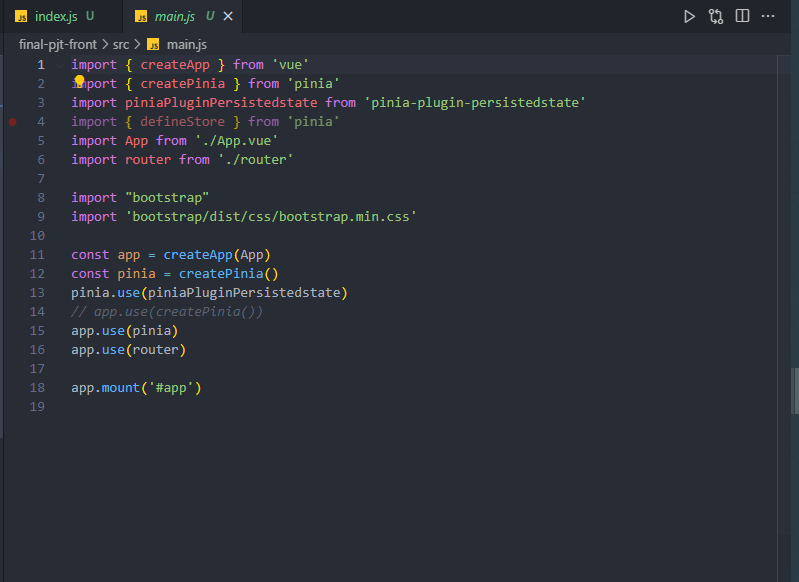


4. 컴포넌트 구성

src/componenets와 src/views의 .vue 확장자 파일의 분류
src/component의 컴포넌트- 라우터용으로 사용될 가능성이 적음
src/views의 컴포넌트- 적어도 하나의 라우터에서 사용.
일반적인 분류방법. 프로젝트를 구성하면서 각 프로젝트 성격에 맞게 구분하면 된다.



**컴포넌트 구조**

회원)
src/views/userviews/
SignupView: 회원가입
LoginView: 로그인
UserPageView: 회원 마이페이지

src/components/user/
(UserPageView->)
UserPageUpdate: 회원 정보 수정(<
UserPagePortfolio: 회원 포트폴리오(가입된 상품 등)
UserPageRecommend: 회원 맞춤 추천 상품


서비스)
src/views/serviceviews/
ProductView: 예적금 상품 조회, 비교
ExchangeRageView: 환율계산
BankView: 은행 정보, 검색
CommunityView: 커뮤니티(게시판)

src/componenets/userviews/
(ProductView->)
ProductList: 예, 적금 상품 리스트 조회
ProductCompare: 예, 적금 상품 비교


1. 라우터 작성

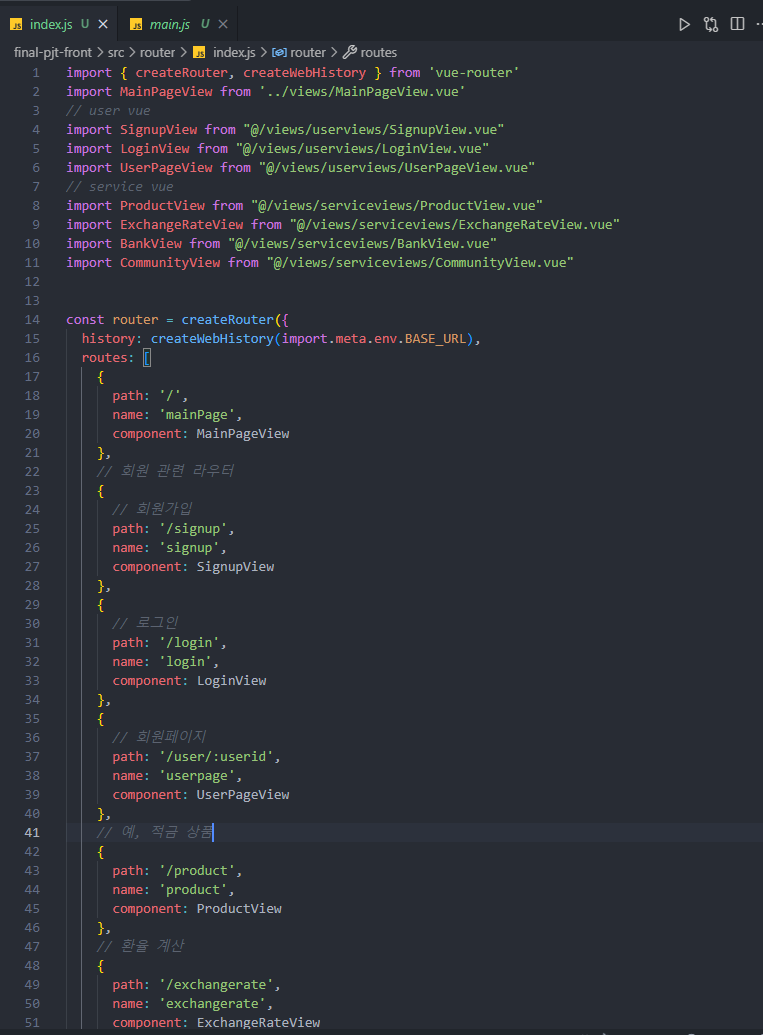


In [ ]:
import { createRouter, createWebHistory } from 'vue-router'
import MainPageView from '../views/MainPageView.vue'
// user vue
import SignupView from "@/views/userviews/SignupView.vue"
import LoginView from "@/views/userviews/LoginView.vue"
import UserPageView from "@/views/userviews/UserPageView.vue"
// service vue
import ProductView from "@/views/serviceviews/ProductView.vue"
import ExchangeRateView from "@/views/serviceviews/ExchangeRateView.vue"
import BankView from "@/views/serviceviews/BankView.vue"
import CommunityView from "@/views/serviceviews/CommunityView.vue"


const router = createRouter({
  history: createWebHistory(import.meta.env.BASE_URL),
  routes: [
    {
      path: '/',
      name: 'mainPage',
      component: MainPageView
    },
    // 회원 관련 라우터
    {
      // 회원가입
      path: '/signup',
      name: 'signup',
      component: SignupView
    },
    {
      // 로그인
      path: '/login',
      name: 'login',
      component: LoginView
    },
    {
      // 회원페이지
      path: '/user/:userid',
      name: 'userpage',
      component: UserPageView
    },
    // 예, 적금 상품
    {
      path: '/product',
      name: 'product',
      component: ProductView
    },
    // 환율 계산
    {
      path: '/exchangerate',
      name: 'exchangerate',
      component: ExchangeRateView
    },
    // 은행 정보 조회
    {
      path: '/bank',
      name: 'bank',
      component: BankView
    },
    // 커뮤니티
    {
      path: '/community',
      name: 'community',
      component: CommunityView
    },
  ]
})

export default router



6. 메인페이지 구성(임시)

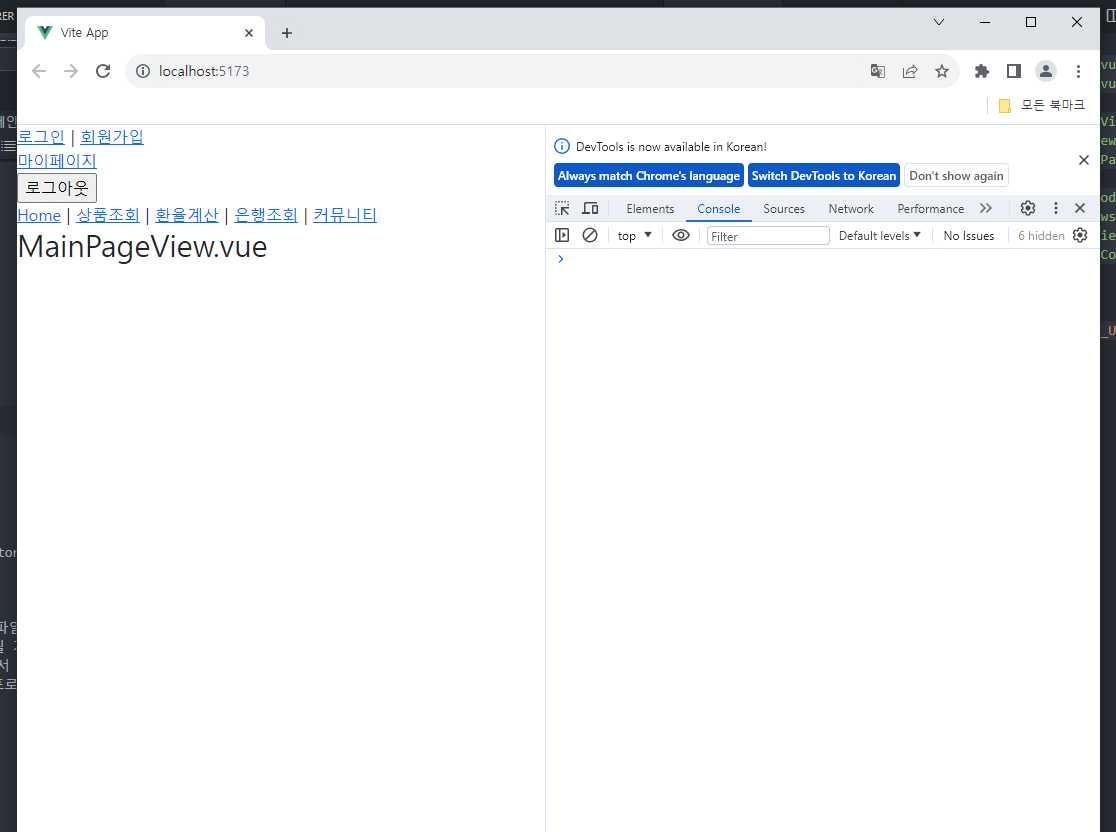

7. 회원가입, 로그인 auth store 작성, 컴포넌트 폼 작성

authStore

- 회원가입, 로그인, 로그아웃, 회원정보수정, 회원탈퇴 기능 작성(테스트 필요)

In [ ]:
// 회원가입, 로그인 auth store 작성
import { ref, computed } from 'vue'
import { defineStore } from 'pinia'
import axios from "axios"
import router from '../router'
import { useProductStore } from "@/stores/product"

export const useAuthStore = defineStore('auth', () => {

  const productStore = useProductStore()
  const token = ref(null)
  const state = ref(null)
  // 로그인 여부 계산
  const isLogined = computed(()=>{
    if (token.value === null ) {
      return false
    } else {
      return true
    }
  })

  const signUp = function(payload) {
    const { username, password1, password2, email } = payload
    axios({
      method : "post",
      url : `${productStore.API_URL}/accounts/signup/`,
      data : {
        username,
        password1,
        password2,
        email,
      }
    })
    .then((res)=>{
      // console.log(res)
      window.alert("회원가입 완료")
      router.push({name:'mainPage'})
      logIn({username, password})
      // -----------------------  user id 확인해야함  --------------------------
      // router.push({name:'userpage', params:{userid:user.id}})
      router.push({name:'userpage', params:{userid:state.userid}})

    })
    .catch((err)=>{
      window.alert("error occurred")
      console.log(err)
    })
  }

  const logIn = function(payload) {
    const { username, password } = payload
    axios({
      method : "post",
      url: `${productStore.API_URL}/accounts/login/`,
      data:{
        username,
        password,
      }
    })
    .then((res)=>{
      token.value = res.data.key
      state.value = res.data
      router.push({name:'mainPage'})
      
    })
    .catch((err)=>{
      window.alert("error occurred")
      console.log(err)
    })
  }

  const logOut = function () {
    axios({
      method: "post",
      url: `${productStore.API_URL}/accounts/logout/`,
    })
    .then((res)=>{
      console.log(res)
      token.value = null
      state.value = null
      router.push({name: 'mainPage'})

    })
    .catch((err)=>{
      console.log(err)
    })
  }
  const deleteUser = function(payload){
    axios({
      method: "delete",
      // --------------- userid 확인필요 ----------------------
      url: `${productStore.API_URL}/accounts/${userid}/delete/`
    })
    .then((res)=>{
      console.log(res)
      // --------------- 확인필요 ----------------------

      token.value = null
      state.value = null
      router.push({name:'mainPage'})

      // logOut(payload)

    })
    .catch((err)=>{
      console.log(err)
    })
  }

  // 회원정보 수정
  const updateUser = function(payload){
    // username 수정 불가, 데이터만 받음 nickname, email 수정 가능
    const { username, nickname, email, age, money } = payload
    axios({
      method : "put",
      // --------------- userid 확인필요 ----------------------
      url: `${productStore.API_URL}/accounts/${userid}/update/`,
      data:{
        username,
        nickname,
        email,
        age,
        money,
      }
    })
    .then((res)=>{
      window.alert("수정 완료.")
      console.log(res)
      router.push({name:'userpage'})
    })
    .catch((err)=>{
      console.log(err)
    })
  }

  // 비밀번호 수정
  

  return { token, isLogined, signUp, logIn, logOut, deleteUser, updateUser }
}, {persist:true})
